In [146]:
import pandas as pd
import matplotlib.pyplot as plt #для построения графиков
import seaborn as sns #для визуализации графиков
import numpy as np

In [147]:
# Отключение варнингов - лишние предупреждения
import warnings
warnings.filterwarnings("ignore")

In [148]:
city = pd.read_csv("city_clients.csv")

In [149]:
city.head(10)

,party_rk,gorod_client_flg,fuel_gmv,fuel_avg_price,fuel_n_orders,fuel_first_order_date,fuel_last_order_date,supermarket_gmv,supermarket_avg_price,supermarket_n_orders,...,kino_gmv,kino_transactions_cnt,arenda_avto_gmv,arenda_avto_transactions_cnt,knigi_gmv,knigi_transactions_cnt,zhivotnye_gmv,zhivotnye_transactions_cnt,turagentstva_gmv,turagentstva_transactions_cnt
0,1002611776,1,1499.06,749.530000,2.0,2023-05-22,2024-07-08,NaN,NaN,NaN,...,798.0,128.0,0.0,128.0,0.0,128.0,0.0,128.0,0.00,128.0
1,812910044,1,5600.68,1866.893333,3.0,2023-01-12,2024-03-30,NaN,NaN,NaN,...,0.0,92.0,0.0,92.0,0.0,92.0,0.0,92.0,0.00,92.0
2,379196768,1,32831.06,1492.320909,22.0,2023-08-12,2024-09-28,3775.76,1887.880000,2.0,...,512.0,457.0,0.0,457.0,0.0,457.0,0.0,457.0,21680.00,457.0
3,695174271,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,292.0,0.0,292.0,0.0,292.0,0.0,292.0,0.00,292.0
4,843828836,1,NaN,NaN,NaN,NaN,NaN,1687.82,1687.820000,1.0,...,0.0,528.0,0.0,528.0,0.0,528.0,0.0,528.0,0.00,528.0
5,368255067,1,80070.20,2582.909677,31.0,2022-08-05,2024-10-17,NaN,NaN,NaN,...,0.0,331.0,0.0,331.0,0.0,331.0,0.0,331.0,209189.56,331.0
6,313612161,1,NaN,NaN,NaN,NaN,NaN,2256.00,2256.000000,1.0,...,0.0,282.0,0.0,282.0,1101.0,282.0,0.0,282.0,0.00,282.0
7,596965562,1,NaN,NaN,NaN,NaN,NaN,123856.94,1935.264688,64.0,...,0.0,329.0,0.0,329.0,2274.0,329.0,0.0,329.0,0.00,329.0
8,380761555,1,19289.48,2143.275556,9.0,2021-10-09,2024-08-24,30037.90,1430.376190,21.0,...,0.0,575.0,0.0,575.0,0.0,575.0,0.0,575.0,50270.00,575.0
9,946222843,1,8797.22,1466.203333,6.0,2024-03-07,2024-04-14,NaN,NaN,NaN,...,0.0,153.0,0.0,153.0,0.0,153.0,0.0,153.0,0.00,153.0


Подготовка данных к работе без сюрпризов

In [150]:
city.isna().sum() #поиск пропущенных значений

party_rk                              0
gorod_client_flg                      0
fuel_gmv                         626029
fuel_avg_price                   626029
fuel_n_orders                    626029
                                  ...  
knigi_transactions_cnt            16481
zhivotnye_gmv                     16481
zhivotnye_transactions_cnt        16481
turagentstva_gmv                  16481
turagentstva_transactions_cnt     16481
Length: 68, dtype: int64

In [151]:
 #замена пропущенных значений
#только числовые столбцы, даты оставляем как есть
city = city.fillna({c: 0 for c in city.select_dtypes(include=['number']).columns})

In [152]:
city.loc[city.duplicated()] #проверка наличия дубликатов, их не оказалось

,party_rk,gorod_client_flg,fuel_gmv,fuel_avg_price,fuel_n_orders,fuel_first_order_date,fuel_last_order_date,supermarket_gmv,supermarket_avg_price,supermarket_n_orders,...,kino_gmv,kino_transactions_cnt,arenda_avto_gmv,arenda_avto_transactions_cnt,knigi_gmv,knigi_transactions_cnt,zhivotnye_gmv,zhivotnye_transactions_cnt,turagentstva_gmv,turagentstva_transactions_cnt


In [153]:
city.head(20)

,party_rk,gorod_client_flg,fuel_gmv,fuel_avg_price,fuel_n_orders,fuel_first_order_date,fuel_last_order_date,supermarket_gmv,supermarket_avg_price,supermarket_n_orders,...,kino_gmv,kino_transactions_cnt,arenda_avto_gmv,arenda_avto_transactions_cnt,knigi_gmv,knigi_transactions_cnt,zhivotnye_gmv,zhivotnye_transactions_cnt,turagentstva_gmv,turagentstva_transactions_cnt
0,1002611776,1,1499.06,749.530000,2.0,2023-05-22,2024-07-08,0.00,0.000000,0.0,...,798.0,128.0,0.0,128.0,0.0,128.0,0.0,128.0,0.00,128.0
1,812910044,1,5600.68,1866.893333,3.0,2023-01-12,2024-03-30,0.00,0.000000,0.0,...,0.0,92.0,0.0,92.0,0.0,92.0,0.0,92.0,0.00,92.0
2,379196768,1,32831.06,1492.320909,22.0,2023-08-12,2024-09-28,3775.76,1887.880000,2.0,...,512.0,457.0,0.0,457.0,0.0,457.0,0.0,457.0,21680.00,457.0
3,695174271,1,0.00,0.000000,0.0,NaN,NaN,0.00,0.000000,0.0,...,0.0,292.0,0.0,292.0,0.0,292.0,0.0,292.0,0.00,292.0
4,843828836,1,0.00,0.000000,0.0,NaN,NaN,1687.82,1687.820000,1.0,...,0.0,528.0,0.0,528.0,0.0,528.0,0.0,528.0,0.00,528.0
5,368255067,1,80070.20,2582.909677,31.0,2022-08-05,2024-10-17,0.00,0.000000,0.0,...,0.0,331.0,0.0,331.0,0.0,331.0,0.0,331.0,209189.56,331.0
6,313612161,1,0.00,0.000000,0.0,NaN,NaN,2256.00,2256.000000,1.0,...,0.0,282.0,0.0,282.0,1101.0,282.0,0.0,282.0,0.00,282.0
7,596965562,1,0.00,0.000000,0.0,NaN,NaN,123856.94,1935.264688,64.0,...,0.0,329.0,0.0,329.0,2274.0,329.0,0.0,329.0,0.00,329.0
8,380761555,1,19289.48,2143.275556,9.0,2021-10-09,2024-08-24,30037.90,1430.376190,21.0,...,0.0,575.0,0.0,575.0,0.0,575.0,0.0,575.0,50270.00,575.0
9,946222843,1,8797.22,1466.203333,6.0,2024-03-07,2024-04-14,0.00,0.000000,0.0,...,0.0,153.0,0.0,153.0,0.0,153.0,0.0,153.0,0.00,153.0


Расчет показателей

In [154]:
#кол-во уникальных пользователей и их процент от общего числа
city.groupby('gorod_client_flg')['party_rk'] \
    .nunique() \
    .rename('users') \
    .pipe(lambda s: s.to_frame()
                    .assign(share=lambda d: (d['users']/d['users'].sum()).round(4))) \
    .reset_index()

,gorod_client_flg,users,share
0,0,500000,0.5
1,1,500000,0.5


Хмм.. 50/50.. Чем же они отличаются? Как завлечь больше людей к нам

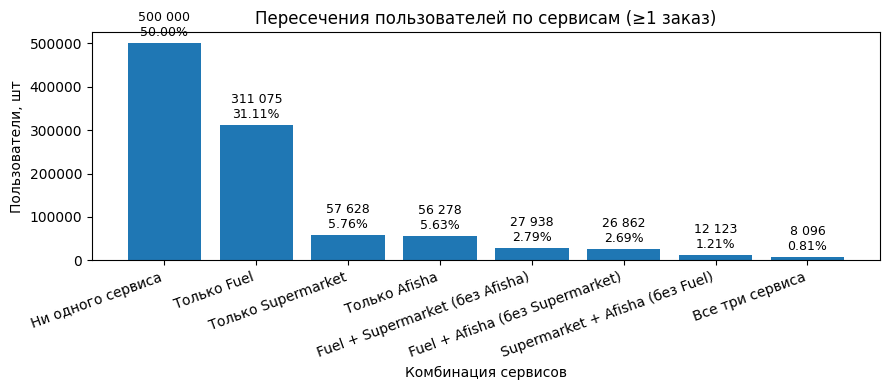

,Комбинация,"Пользователей, шт","Доля, %"
0,Ни одного сервиса,500000,50.00
1,Только Fuel,311075,31.11
2,Только Supermarket,57628,5.76
3,Только Afisha,56278,5.63
4,Fuel + Supermarket (без Afisha),27938,2.79
5,Fuel + Afisha (без Supermarket),26862,2.69
6,Supermarket + Afisha (без Fuel),12123,1.21
7,Все три сервиса,8096,0.81


In [155]:
#Построим пересечения юзеров
flags = (city[['fuel_n_orders','supermarket_n_orders','afisha_n_orders']]
         .apply(pd.to_numeric, errors='coerce')
         .fillna(0).clip(lower=0).gt(0)
         .rename(columns={'fuel_n_orders':'Fuel','supermarket_n_orders':'Supermarket','afisha_n_orders':'Afisha'}))

svc_cnt = flags.sum(axis=1)
total = len(flags)

only_fuel         = int(((flags['Fuel']) & (~flags['Supermarket']) & (~flags['Afisha'])).sum())
only_supermarket  = int(((~flags['Fuel']) & (flags['Supermarket']) & (~flags['Afisha'])).sum())
only_afisha       = int(((~flags['Fuel']) & (~flags['Supermarket']) & (flags['Afisha'])).sum())
fuel_super_only   = int(((flags['Fuel']) & (flags['Supermarket']) & (~flags['Afisha'])).sum())
fuel_afisha_only  = int(((flags['Fuel']) & (~flags['Supermarket']) & (flags['Afisha'])).sum())
super_afisha_only = int(((~flags['Fuel']) & (flags['Supermarket']) & (flags['Afisha'])).sum())
all_three         = int(((flags['Fuel']) & (flags['Supermarket']) & (flags['Afisha'])).sum())
none              = int((svc_cnt == 0).sum())

res = pd.DataFrame([
    ["Ни одного сервиса", none],
    ["Только Fuel", only_fuel],
    ["Только Supermarket", only_supermarket],
    ["Только Afisha", only_afisha],
    ["Fuel + Supermarket (без Afisha)", fuel_super_only],
    ["Fuel + Afisha (без Supermarket)", fuel_afisha_only],
    ["Supermarket + Afisha (без Fuel)", super_afisha_only],
    ["Все три сервиса", all_three],
], columns=["Комбинация", "Пользователей, шт"])
res["Доля, %"] = (res["Пользователей, шт"] / total * 100).round(2)

# 2) Бар-чарт (одна ось). Подписи: "кол-во\nдоля"
fig, ax = plt.subplots(figsize=(9,4))
bars = ax.bar(res["Комбинация"], res["Пользователей, шт"])
ax.set_title("Пересечения пользователей по сервисам (≥1 заказ)")
ax.set_xlabel("Комбинация сервисов")
ax.set_ylabel("Пользователи, шт")
ax.set_xticklabels(res["Комбинация"], rotation=20, ha="right")

for rect, cnt, pct in zip(bars, res["Пользователей, шт"], res["Доля, %"]):
    ax.annotate(f"{cnt:,}\n{pct:.2f}%".replace(",", " "),
                xy=(rect.get_x()+rect.get_width()/2, rect.get_height()),
                xytext=(0, 3), textcoords="offset points",
                ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()

res

Так как большинство пользователей пользуется только топливом, то надо придумать как их замотивировать пользоваться ещё и другими продуктами

Какие конкурентные преимущества есть перед конкурентами и почему люди могут захотеть пользоваться именно нашими продуктами

In [ ]:
# безопасная типизация
for c in [c for c in city.columns if c.endswith('_date')]:
    city[c] = pd.to_datetime(city[c], errors='coerce')
for c in ['fuel_n_orders','supermarket_n_orders','afisha_n_orders']:
    city[c] = pd.to_numeric(city[c], errors='coerce').fillna(0).clip(lower=0)

def rolling_retention_rates(df, prefix, days_list=(30,60,90)):
    n, f, l = f'{prefix}_n_orders', f'{prefix}_first_order_date', f'{prefix}_last_order_date'
    cohort = df[f].notna()
    cohort_size = int(cohort.sum())
    rates = []
    for d in days_list:
        kept = ((df[n] >= 2) & df[l].notna() & df[f].notna()
                & ((df[l] - df[f]) >= pd.Timedelta(days=d))).sum()
        rates.append((kept / cohort_size) if cohort_size>0 else np.nan)
    return rates

services = ['fuel','supermarket','afisha']
rr = {s: rolling_retention_rates(city, s, (30,60,90)) for s in services}

In [ ]:
from matplotlib.ticker import PercentFormatter

services = ['fuel','supermarket','afisha']
labels   = {'fuel':'Fuel', 'supermarket':'Supermarket', 'afisha':'Afisha'}
days     = [30,60,90]
x = range(len(days))

offset = {'fuel':(+8), 'supermarket':(-10), 'afisha':(+14)}  # вертикальные сдвиги в пунктах

fig, ax = plt.subplots(figsize=(7,4))
for s in services:
    y = rr[s]  # список из 3 значений RR (0..1)
    line, = ax.plot(x, y, marker='o', label=labels[s])   # ← берём объект линии
    c = line.get_color()                                  # ← его цвет
    for xi, yi in zip(x, y):
        ax.annotate(f'{yi*100:.1f}%',
                    (xi, yi),
                    textcoords='offset points', xytext=(0, offset[s]),
                    ha='center', va='bottom', fontsize=9,
                    color=c,                                     # ← цвет текста = цвет линии
                    bbox=dict(boxstyle='round,pad=0.15', fc='white', ec='none', alpha=0.7))

ax.set_xticks(x); ax.set_xticklabels([f'{d}d' for d in days])
ax.set_ylim(0,1); ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.grid(True, alpha=.3); ax.legend(); plt.tight_layout(); plt.show()


Fuel имеет «Сильное удержание: RR30≈73%, RR60≈68%, RR90≈64%. Топливо — регулярный сервис с устойчивым возвратом.»
Supermarket имеет «Среднее удержание: RR30≈43%, RR60≈37%, RR90≈33%. Потенциал роста через бандлы и “повторить заказ” в 1 клик.»
Afisha имеет «Низко-среднее удержание: RR30≈37%, RR60≈35%, RR90≈34%. Нужны события/подборки на выходные и кросс-селл из Fuel.»

In [ ]:
# % пользователей, которые ушли после первого заказа (one-and-done) — по сервисам и в целом
import pandas as pd

# Приводим к числам
cols = ['fuel_n_orders','supermarket_n_orders','afisha_n_orders']
for c in cols:
    city[c] = pd.to_numeric(city[c], errors='coerce').fillna(0).clip(lower=0)

# Функция для сервиса
def one_and_done(df, col):
    active = (df[col] > 0).sum()
    one = (df[col] == 1).sum()
    rate = (one / active * 100) if active else 0.0
    return active, one, round(rate, 2)

rows = []
for name, col in [('Fuel','fuel_n_orders'),
                  ('Supermarket','supermarket_n_orders'),
                  ('Afisha','afisha_n_orders')]:
    active, one, rate = one_and_done(city, col)
    rows.append([name, active, one, rate])

# В целом (по любому из трёх сервисов)
city['total_orders_3svc'] = city[cols].sum(axis=1)
active_any = (city['total_orders_3svc'] > 0).sum()
one_any = (city['total_orders_3svc'] == 1).sum()
rate_any = round(one_any/active_any*100, 2) if active_any else 0.0
rows.append(['Любой сервис (из 3)', active_any, one_any, rate_any])

out = pd.DataFrame(rows, columns=['Сервис','Активных (>=1 заказ)','Только 1 заказ','% ушли после 1-го'])
out


In [ ]:
# GMV «Афиши» (обрезаем отрицательные/NaN)
afisha_gmv = (pd.to_numeric(city["afisha_gmv"], errors="coerce")
                .fillna(0).clip(lower=0).sum())

# Дополнительно: число пользователей «Афиши»
afisha_users = (pd.to_numeric(city["afisha_n_orders"], errors="coerce")
                  .fillna(0).gt(0).sum())

print(f"Afisha GMV = {afisha_gmv:,.2f} ₽")
print(f"Afisha users (>=1 заказ) = {afisha_users:,}")

In [ ]:
import pandas as pd

city = pd.read_csv("city_clients.csv")

# GMV Продуктов (без отрицательных/NaN)
super_gmv = (pd.to_numeric(city["supermarket_gmv"], errors="coerce")
               .fillna(0).clip(lower=0).sum())

# Пользователи Продуктов (сделали ≥1 заказ)
super_users = (pd.to_numeric(city["supermarket_n_orders"], errors="coerce")
                 .fillna(0).gt(0).sum())

# Доля на рынке e-grocery (Data Insight: 1.2 трлн ₽ за 2024)
EGROCERY_MARKET_RUB = 1_200_000_000_000
super_share = super_gmv / EGROCERY_MARKET_RUB

print(f"Supermarket GMV = {super_gmv:,.0f} ₽")
print(f"Supermarket users (>=1 заказ) = {super_users:,}")
print(f"Доля в e-grocery ≈ {super_share*100:.2f}% (знаменатель: 1.2 трлн ₽)")


In [ ]:
import pandas as pd

city = pd.read_csv("city_clients.csv")

# GMV Топлива (без отрицательных/NaN)
fuel_gmv = (pd.to_numeric(city["fuel_gmv"], errors="coerce")
              .fillna(0).clip(lower=0).sum())

# Пользователи Топлива (>=1 заказ)
fuel_users = (pd.to_numeric(city["fuel_n_orders"], errors="coerce")
                .fillna(0).gt(0).sum())

# Вариант A: строгая нижняя оценка доли к биржевому обороту (СПбМТСБ, 2024)
SPIMEX_2024_RUB = 2_154_000_000_000  # ~2.154 трлн ₽
fuel_share_spimex = fuel_gmv / SPIMEX_2024_RUB

print(f"Fuel GMV = {fuel_gmv:,.0f} ₽")
print(f"Fuel users (>=1 заказ) = {fuel_users:,}")
print(f"Доля vs СПбМТСБ (нижняя граница) ≈ {fuel_share_spimex*100:.2f}%")

In [ ]:
# Чистим и приводим к числам
gmv = pd.to_numeric(city.get("supermarket_gmv", 0), errors="coerce").fillna(0).clip(lower=0)
n_orders = pd.to_numeric(city.get("supermarket_n_orders", 0), errors="coerce").fillna(0).clip(lower=0)

# Берём только пользователей с ≥1 заказом в "Продуктах"
mask = n_orders > 0
avg_check_per_user = (gmv[mask] / n_orders[mask])

median_avg_check = float(avg_check_per_user.median())

print(f"Медиана средней суммы покупок в 'Продуктах' (по пользователям с ≥1 заказом): {median_avg_check:,.2f} ₽".replace(",", " "))

In [ ]:
#Посмотрим есть ли зависимость

# 1) Утилита приведения к числам
def num(col):
    return pd.to_numeric(df[col], errors="coerce").fillna(0).clip(lower=0)

# 2) Берём нужные столбцы
kino_gmv = num("kino_gmv")
rest_gmv = num("restorany_gmv")

# 3) Корреляции
# Pearson по логам (устойчивее к хвостам)
kino_log = np.log1p(kino_gmv)
rest_log = np.log1p(rest_gmv)
pearson_r = np.corrcoef(kino_log, rest_log)[0, 1]

# Spearman: Pearson по рангам
spearman_r = np.corrcoef(kino_gmv.rank(), rest_gmv.rank())[0, 1]

# Phi между бинарными флагами
kino_used = (kino_gmv > 0).astype(int)
rest_used = (rest_gmv > 0).astype(int)
phi = np.corrcoef(kino_used, rest_used)[0, 1]

print(f"Pearson(log): {pearson_r:.3f}")
print(f"Spearman    : {spearman_r:.3f}")
print(f"Phi (flags) : {phi:.3f}")

# 4) Сравнение трат в ресторанах у «кино-покупателей» и остальных
rest_k1 = rest_gmv[kino_used == 1].to_numpy()
rest_k0 = rest_gmv[kino_used == 0].to_numpy()

med1, med0 = np.median(rest_k1), np.median(rest_k0)
diff_obs = med1 - med0
print(f"Медиана ресторанных трат (kino=1): {med1:,.0f} ₽".replace(",", " "))
print(f"Медиана ресторанных трат (kino=0): {med0:,.0f} ₽".replace(",", " "))
print(f"Разница медиан: {diff_obs:,.0f} ₽".replace(",", " "))

# 5) Перестановочный тест разницы медиан (без scipy)
rng = np.random.default_rng(42)
pool = np.concatenate([rest_k1, rest_k0])
n1 = len(rest_k1)
B = 2000
diffs = np.empty(B)
for b in range(B):
    perm = rng.permutation(pool)
    a, c = perm[:n1], perm[n1:]
    diffs[b] = np.median(a) - np.median(c)

p_val = np.mean(np.abs(diffs) >= abs(diff_obs))
ci_lo, ci_hi = np.percentile(diffs, [2.5, 97.5])
print(f"Permutation p-value: {p_val:.4f}, 95% CI: [{ci_lo:,.0f}; {ci_hi:,.0f}] ₽".replace(",", " "))

# 6) Быстрый scatter для слайда
plt.figure(figsize=(5.2,4))
plt.scatter(kino_log, rest_log, s=5, alpha=0.3)
plt.title("Кино vs Рестораны (log-суммы на пользователя)")
plt.xlabel("log(1 + kino_gmv)")
plt.ylabel("log(1 + restorany_gmv)")
plt.tight_layout(); plt.show()


Pearson(log)=0.285 и Spearman=0.291 — умеренная положительная связь: чем больше человек тратит на кино, тем больше он тратит в ресторанах. (Логи и Спирмен устойчивы к «длинным хвостам», поэтому вывод надёжнее.)

Phi=0.244 по флагам — пользователи, которые вообще покупают билеты, существенно чаще оформляют ресторанные заказы, чем те, кто билеты не покупает.

Медиана трат в ресторанах у «киношников» = 3 633 ₽, у остальных — 0 ₽. То есть типичный «киношник» хотя бы что-то тратит в ресторанах, «некношник» чаще не тратит вовсе. Разница медиан значимая.